### Importando Bibliotecas

In [41]:
import pandas as pd #dataframes

import matplotlib.pyplot as plt #visualizações
%matplotlib inline
import seaborn as sns #visualizações

from ydata_profiling import ProfileReport #EDA automático
import sweetviz as sv #EDA automático

import scipy.stats as stats #testes estatísticos


### Contexto Inicial + Dados

**Contexto:**

"Uma rede de fast-food planeja adicionar um novo item ao seu menu. No entanto, eles ainda estão indecisos entre três possíveis campanhas de marketing para promover o novo produto. Para determinar qual promoção tem o maior efeito nas vendas, o novo item é introduzido em locais de vários mercados selecionados aleatoriamente. Uma promoção diferente é usada em cada local, e as vendas semanais do novo item são registradas nas primeiras quatro semanas."

**Variáveis do dataset:**
- MarketID: id unico do market
- MarketSize: tamanho da area de mercado (por vendas)
- LocationID: id unico da localização da loja
- AgeOfStore: idade da loja em anos
- Promotion: uma das três promoções testadas
- Week: uma das 4 semanas nas quais as promoções aconteceram
- SalesInThousands: vendas em milhares


In [7]:
df = pd.read_csv("dados_ibm_ffm.csv")

In [8]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [63]:
df.shape

(548, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [62]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Sem valores nulos na tabela

As únicas colunas que parecem verdadeiramente numéricas são AgeOfStore e SalesInThousands. Week pode ser considerada também para uma análise temporal, mas não acho que seja o caso. Tratarei, portanto, todas as demais como categóricas para utilizar os pacotes de EDA automático sem que haja confusão e também para não acabar gerando correlações entre dados que não são verdadeiramente numéricos.

Tratar MarketID e LocationID como categóricas trará prejuízos na ordenação dos dados, não acredito que haja relação entre a numeração da LocationID, mas, de qualquer forma, vou manter essas colunas numéricas em um dataframe separado para poder fazer gráficos com a ordenação correta.

Explicando: Por transformar em categórica (string), os MarketIDs ficariam: 1, 10, 2, 3.. ao invés de 1, 2, 3...

In [10]:
df_corrigido = pd.read_csv("dados_ibm_ffm.csv")

In [11]:
df_corrigido['MarketID'] = df_corrigido['MarketID'].astype('category')
df_corrigido['MarketSize'] = df_corrigido['MarketSize'].astype('category')
df_corrigido['LocationID'] = df_corrigido['LocationID'].astype('category')
df_corrigido['Promotion'] = df_corrigido['Promotion'].astype('category')
df_corrigido['week'] = df_corrigido['week'].astype('category')

In [61]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MarketID          548 non-null    category
 1   MarketSize        548 non-null    category
 2   LocationID        548 non-null    category
 3   AgeOfStore        548 non-null    int64   
 4   Promotion         548 non-null    category
 5   week              548 non-null    category
 6   SalesInThousands  548 non-null    float64 
dtypes: category(5), float64(1), int64(1)
memory usage: 17.9 KB


In [13]:
df_corrigido.describe()

,AgeOfStore,SalesInThousands
count,548.000000,548.000000
mean,8.503650,53.466204
std,6.638345,16.755216
min,1.000000,17.340000
25%,4.000000,42.545000
50%,7.000000,50.200000
75%,12.000000,60.477500
max,28.000000,99.650000


In [14]:
distinct_values = df_corrigido.select_dtypes(include='category').nunique()
print("\nQuantidade de valores distintos nas variáveis categóricas:")
print(distinct_values)


Quantidade de valores distintos nas variáveis categóricas:
MarketID       10
MarketSize      3
LocationID    137
Promotion       3
week            4
dtype: int64


Muitos valores distintos na coluna LocationID, possivelmente dificultará análises. Vou dar uma espiada nesses dados para entender melhor.

In [68]:
unique_location_ids = sorted(df['LocationID'].unique())
print(unique_location_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 101, 102, 103, 104, 105, 106, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 301, 302, 303, 304, 305, 306, 307, 308, 309, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920]


Não vai exatamente de 1 a 137, ok, vamos seguir!

### EDAs Automáticos para 1ª Visão

##### Relatórios

In [19]:
# Gerar o relatório de perfil
profile = ProfileReport(df_corrigido, title="Relatório de Perfil do DataFrame", explorative=True,infer_dtypes=False)

# Exibir o relatório no Jupyter Notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


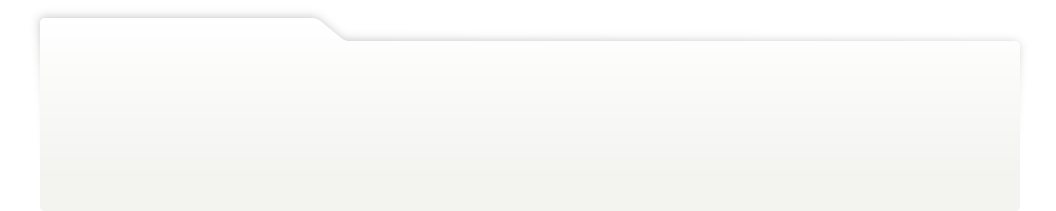
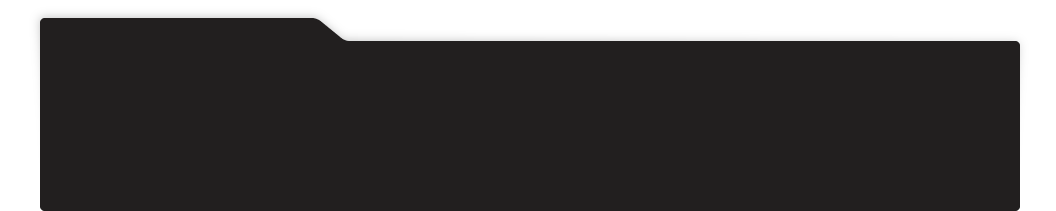
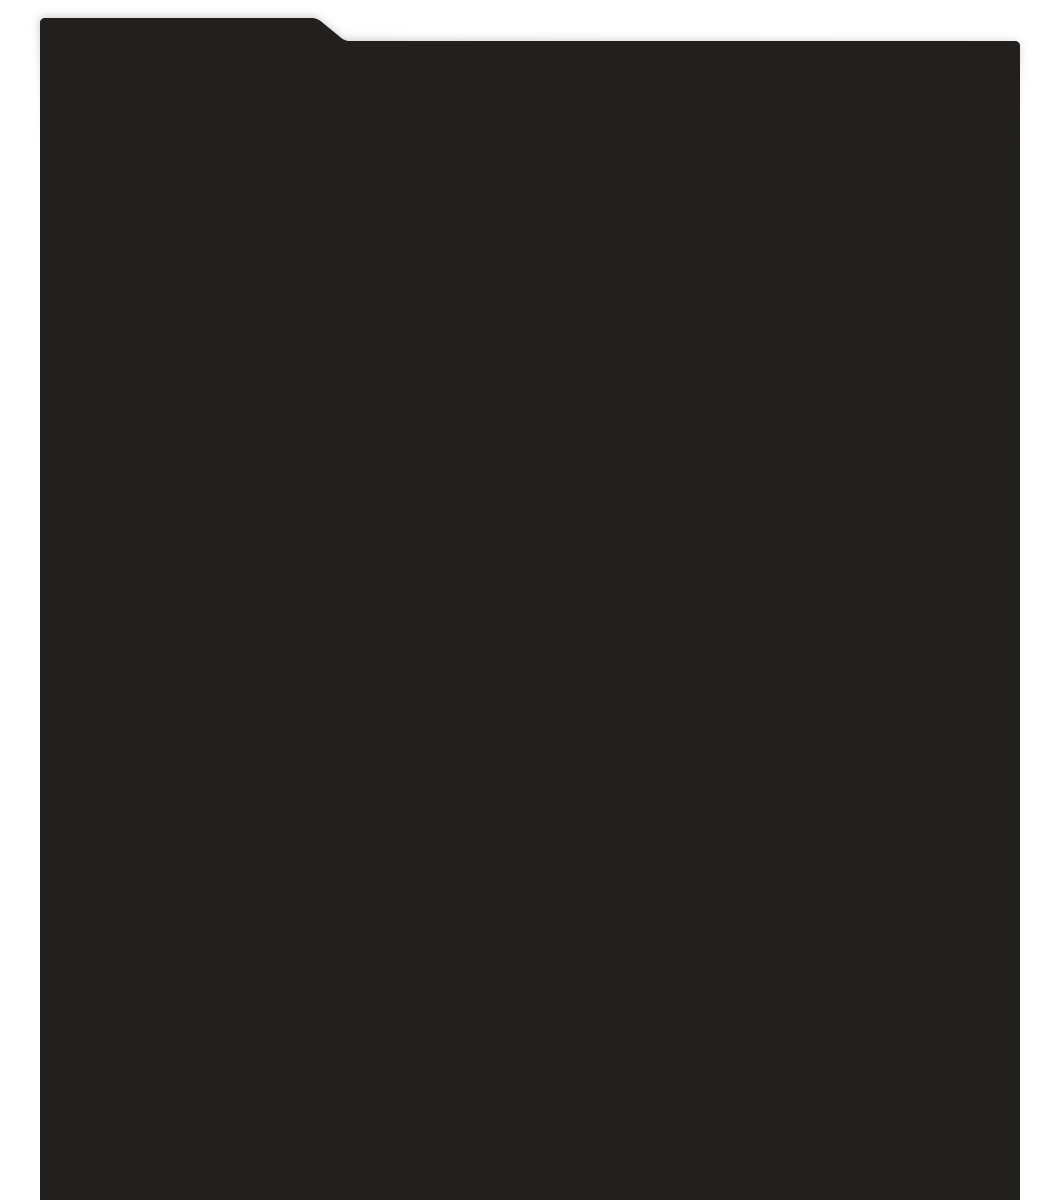
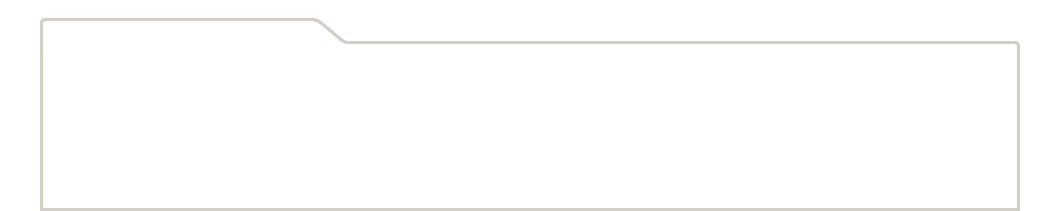
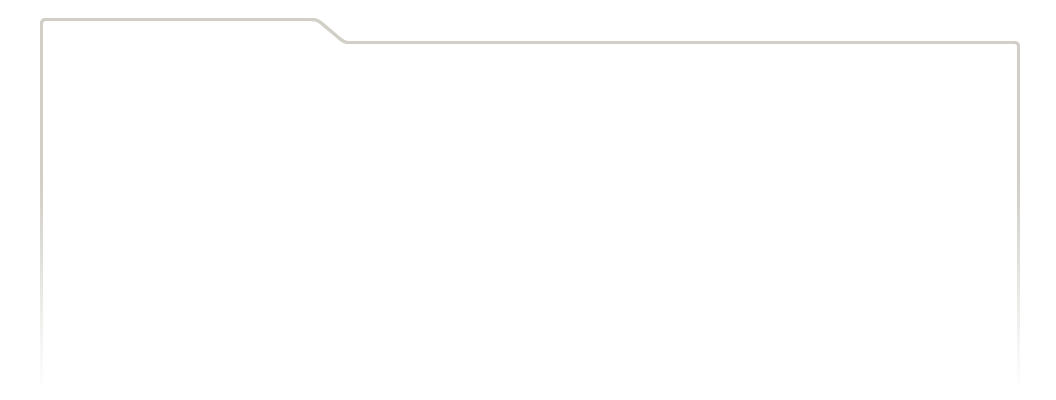
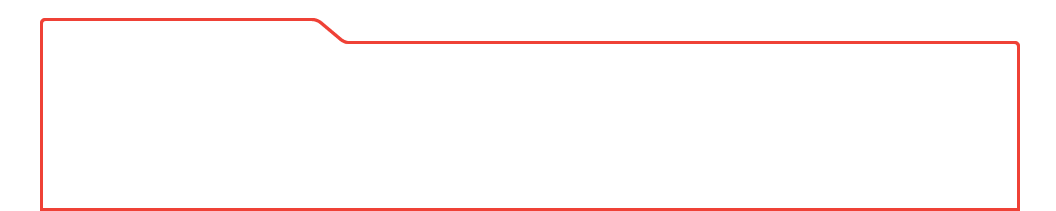
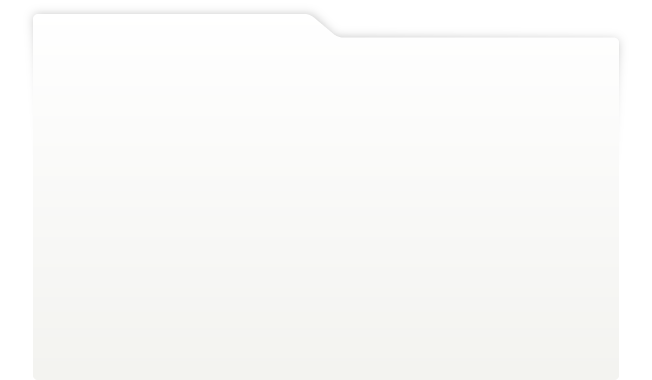
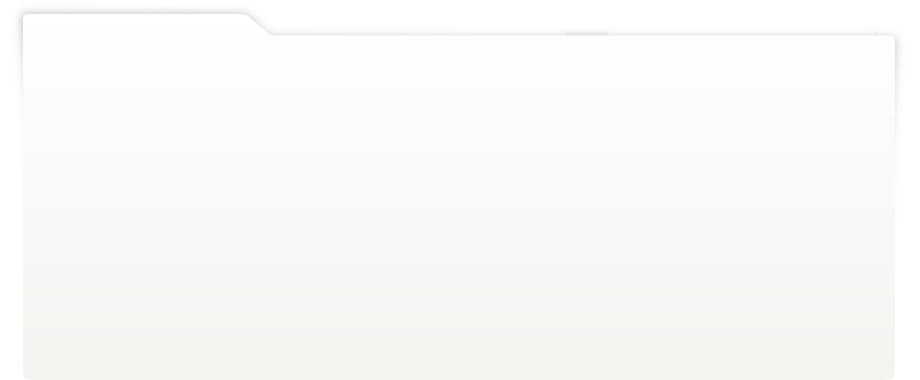
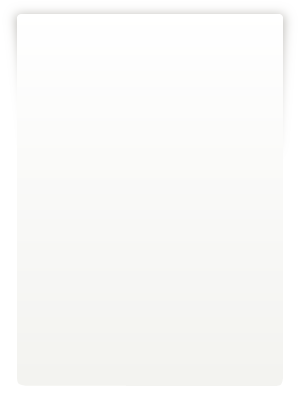
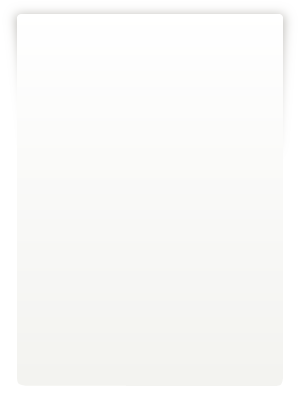
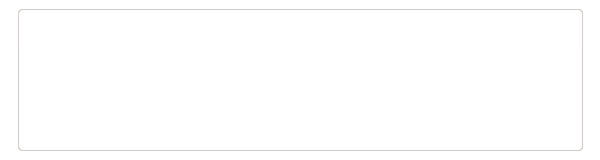
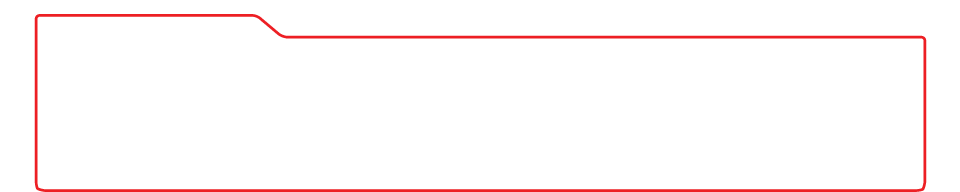
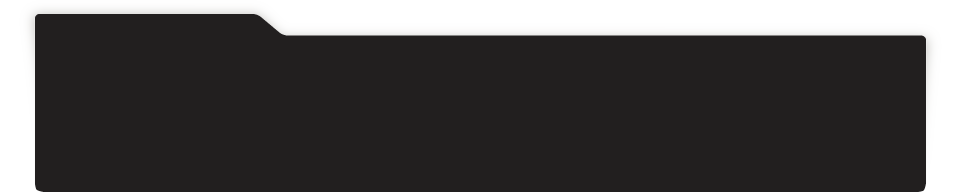
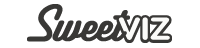
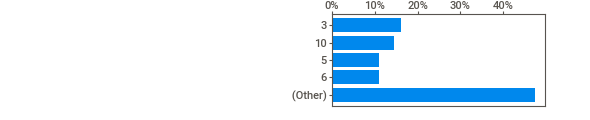
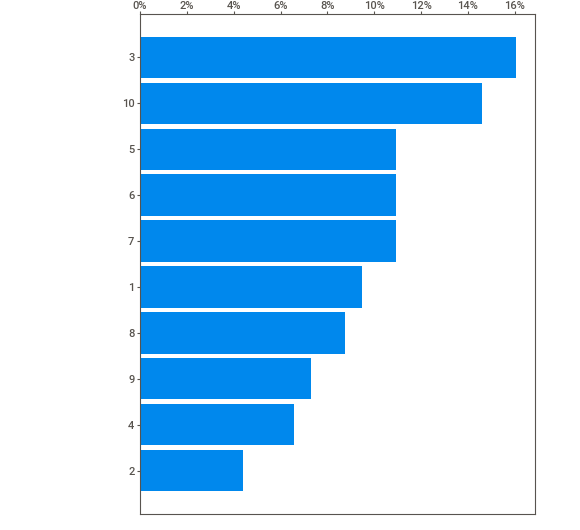
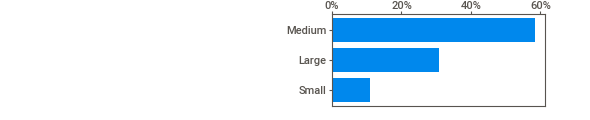
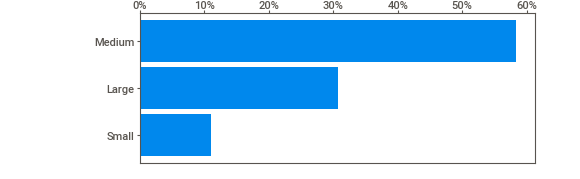
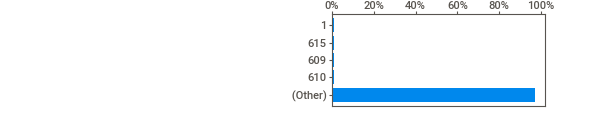
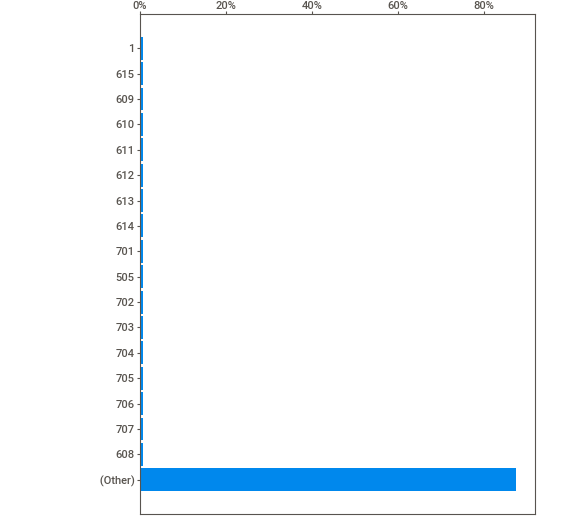
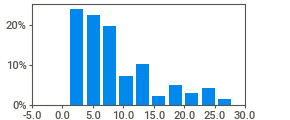
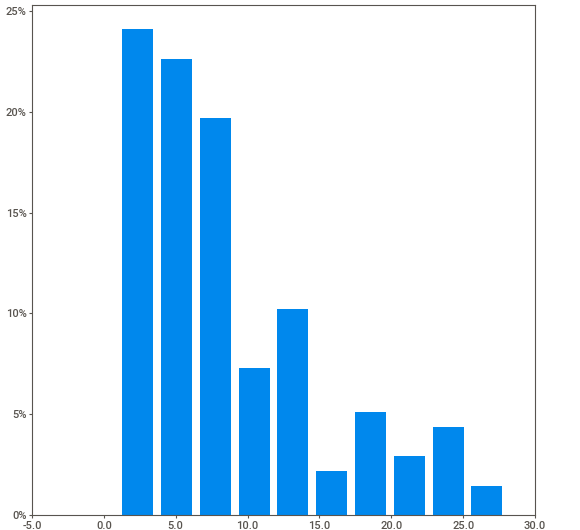
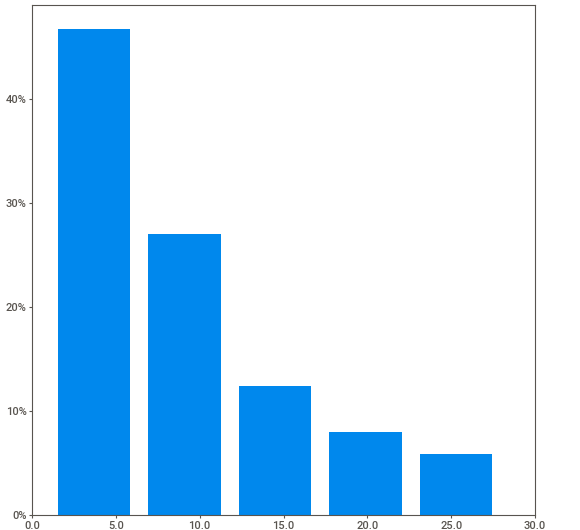
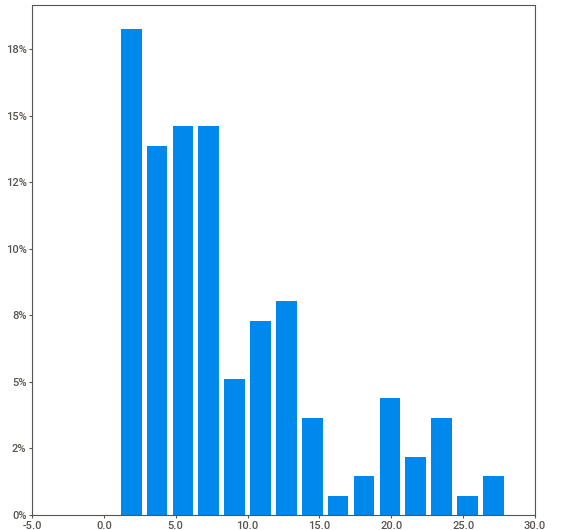
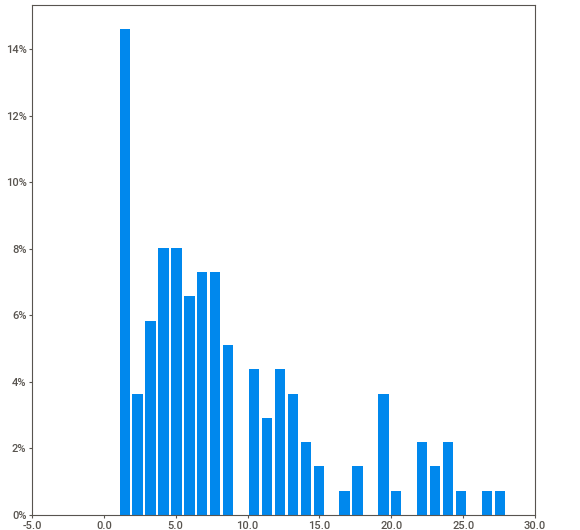
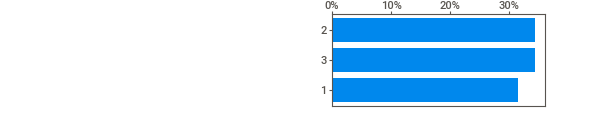
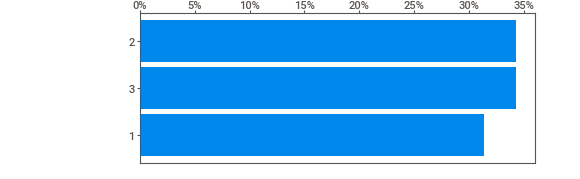
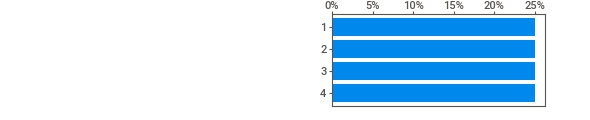
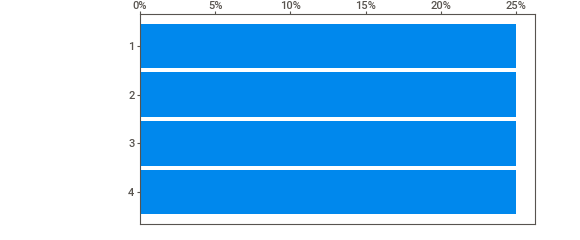
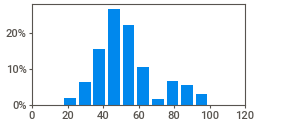
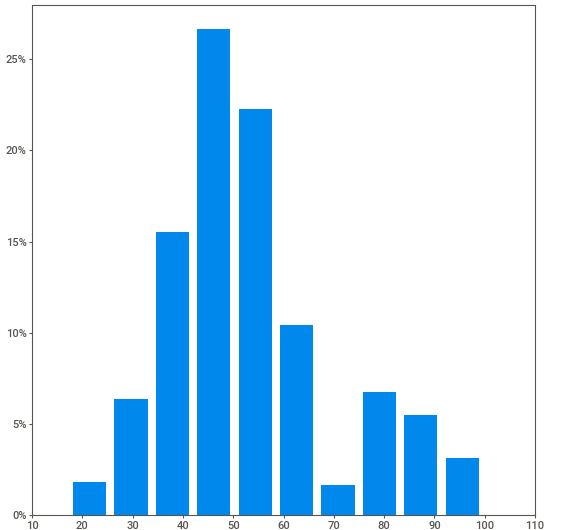
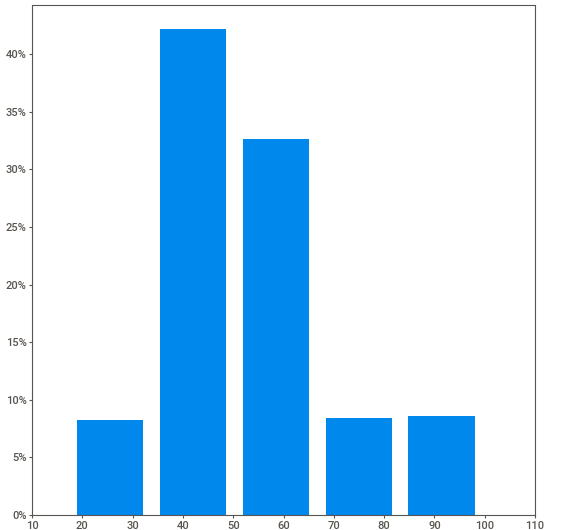
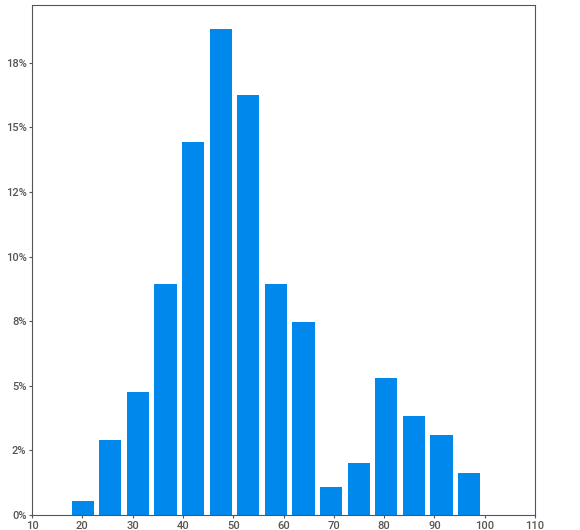
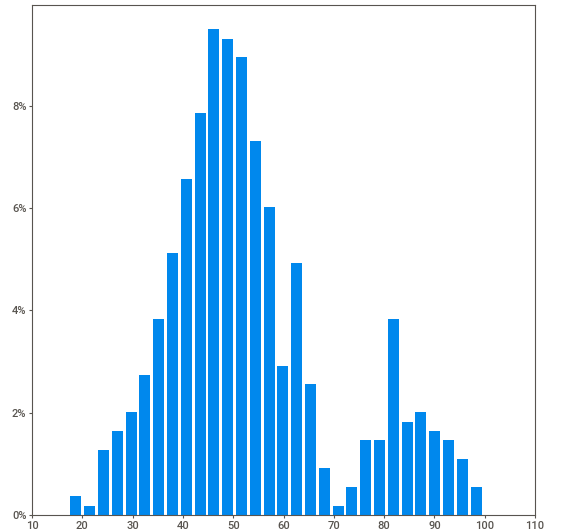
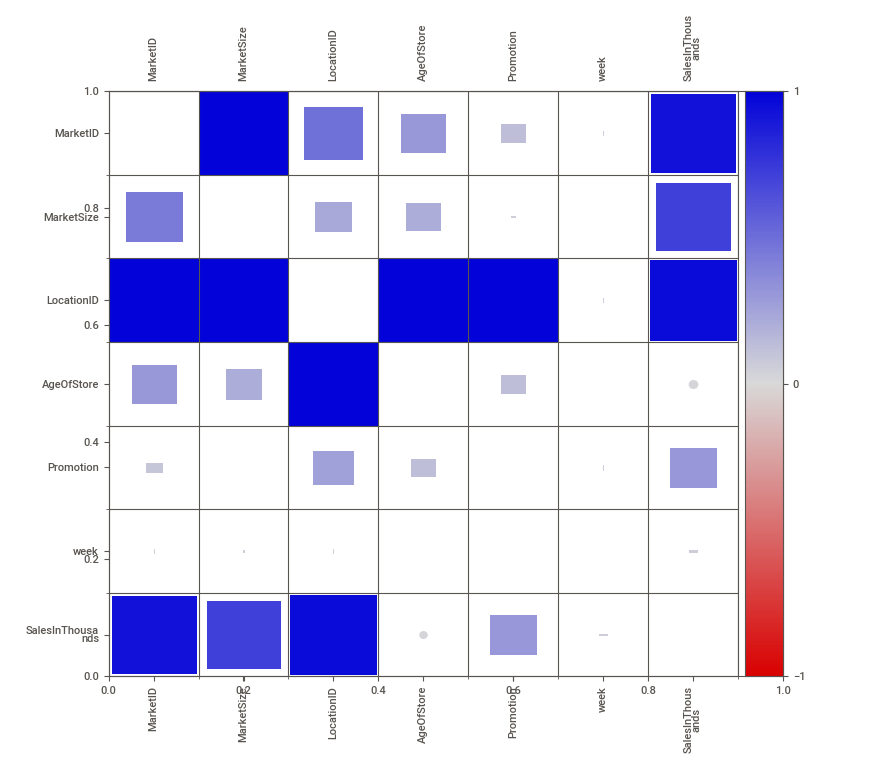
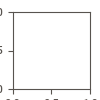

In [20]:
# Gerar o relatório de análise com Sweetviz
report = sv.analyze(df_corrigido)

# Exibir o relatório em um arquivo HTML
report.show_notebook()

##### Primeiras Análises

Alguns pontos:
- 548 observações
- Medium Market Size com 58% dos valores
- LocationIDs bem distribuídos em frequência
- MarketID com maior frequência no 3 e 10, menor no 2
- AgeOfStore frequência concentrada em 1 ano (15%), mediana 7, média 8.5
- Promotion com frequências entre os 3 bem similares (31-34-34%)
- Week frequência igual entre as 4 semanas
- SalesInThousands parece bimodal. Média 53, mediana 50, sd 17
- Correlação fraca entre AgeOfStore e SalesInThousands

### EDA

In [21]:
df_corrigido.head(3)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03


##### Estatísticas AgeofStore por Promotion

In [131]:
df_corrigido.groupby('Promotion', observed=True).describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Idades parecidas por Promotion

##### Estatísticas SalesInThousands por Promotion

In [130]:
df_corrigido.groupby('Promotion', observed=True).describe()['SalesInThousands']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


Parece haver diferença nos resultados de vendas por Promoção aplicada

##### Tabela de Contingência Promotion x MarketSize

In [24]:
crosstab_market_size = pd.crosstab(df_corrigido['Promotion'], df_corrigido['MarketSize'])
print("Tabela de Frequências: Promotion x MarketSize")
print(crosstab_market_size)


Tabela de Frequências: Promotion x MarketSize
MarketSize  Large  Medium  Small
Promotion                       
1              56      96     20
2              64     108     16
3              48     116     24


Maior concentração em Medium, como já imaginado tendo em vista os EDAs automáticos

##### Tabela de Contingência Promotion x Week

In [81]:
crosstab_week = pd.crosstab(df_corrigido['Promotion'], df_corrigido['week'])
print("\nTabela de Frequências: Promotion x Week")
print(crosstab_week)


Tabela de Frequências: Promotion x Week
week        1   2   3   4
Promotion                
1          43  43  43  43
2          47  47  47  47
3          47  47  47  47


Bem distribuído

##### Tabela de Contingência Promotion x MarketSize

In [34]:
crosstab_market_id = pd.crosstab(df_corrigido['Promotion'], df_corrigido['MarketID'])
print("\nTabela de Frequências: Promotion x marketID")
print(crosstab_market_id)


Tabela de Frequências: Promotion x marketID
MarketID    1   2   3   4   5   6   7   8   9  10
Promotion                                        
1          20   4  28  16   8  20  16  20  12  28
2          20   0  24  16  32  24  16   8   8  40
3          12  20  36   4  20  16  28  20  20  12


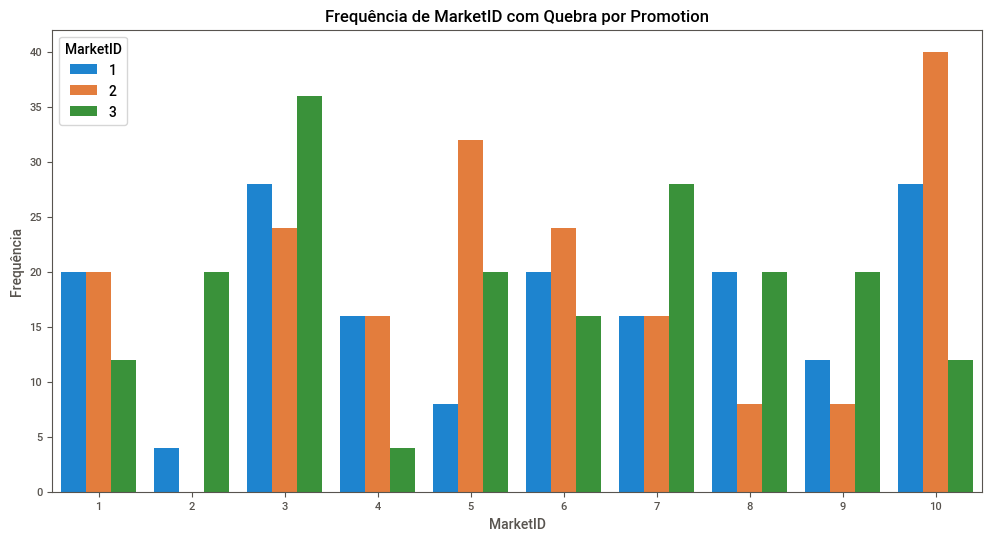

In [91]:
# Criar gráfico de barras verticais
plt.figure(figsize=(12, 6))
sns.countplot(x='MarketID', hue='Promotion', data=df_corrigido)
plt.title('Frequência de MarketID com Quebra por Promotion')
plt.xlabel('MarketID')
plt.ylabel('Frequência')
plt.legend(title='MarketID')
plt.show()

Não está bem segmentado, será que é um problema?

##### Histograma AgeOfStore

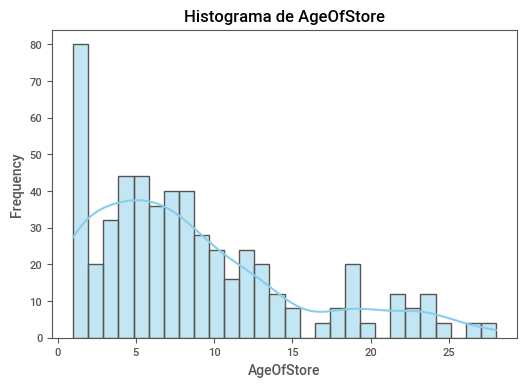

In [46]:
# Criar histograma de SalesInThousands
plt.figure(figsize=(6,4))
sns.histplot(df_corrigido['AgeOfStore'], kde=True, bins=28, color='skyblue')
plt.title('Histograma de AgeOfStore')
plt.xlabel('AgeOfStore')
plt.ylabel('Frequency')
plt.show()

##### Histograma SalesInThousands

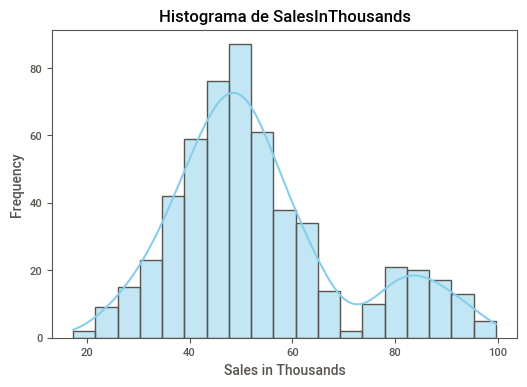

In [43]:
# Criar histograma de SalesInThousands
plt.figure(figsize=(6,4))
sns.histplot(df_corrigido['SalesInThousands'], kde=True, color='skyblue')
plt.title('Histograma de SalesInThousands')
plt.xlabel('Sales in Thousands')
plt.ylabel('Frequency')
plt.show()

##### Analisando Vendas por LocationID

Vou usar o dataframe original para poder ordenar LocationID direitinho

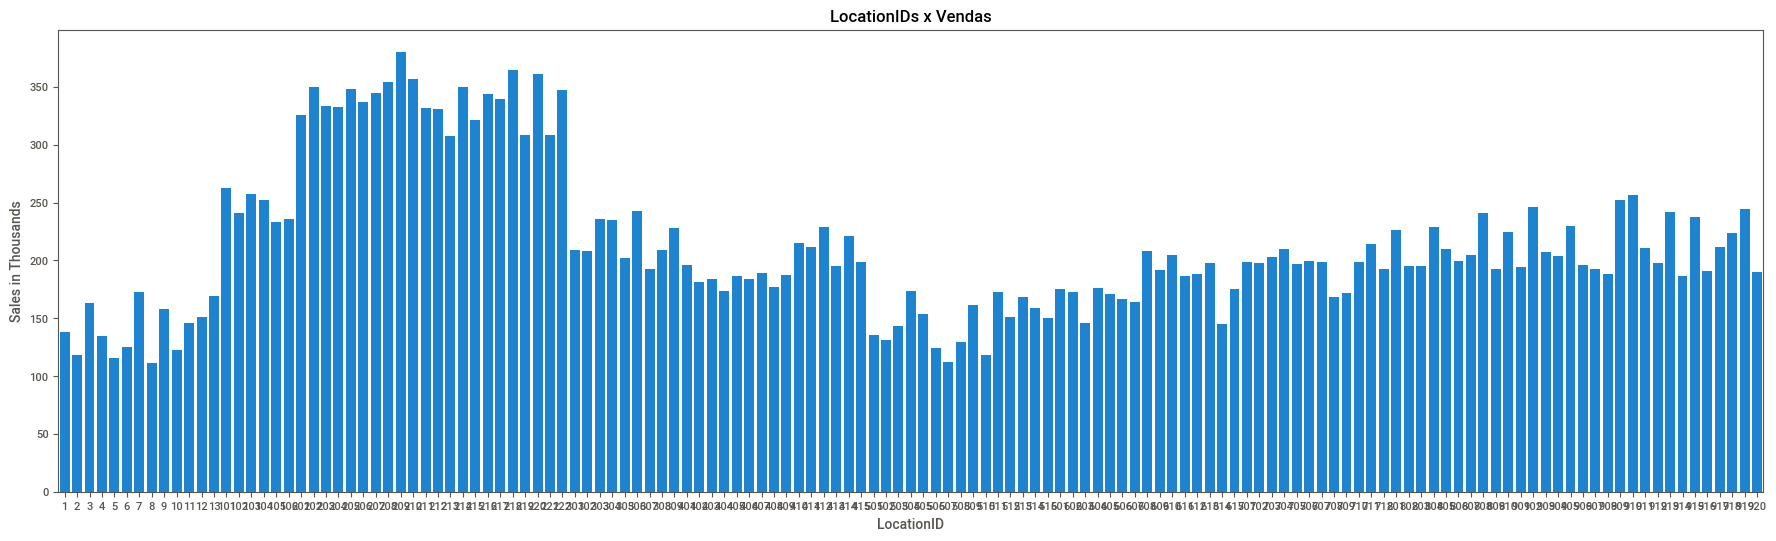

In [73]:
# Sumarizar as vendas por LocationID
location_sales_summary = df.groupby('LocationID', observed=True)['SalesInThousands'].sum().reset_index() 
#Poderia alterar de sum para mean. A distribuição é muito parecida já que a frequência é de observações por LocationID é similar

location_sales_summary = location_sales_summary.sort_values(by='LocationID')

# Plotar gráfico de barras para os top 10 LocationIDs
plt.figure(figsize=(22, 6))
sns.barplot(x='LocationID', y='SalesInThousands', data=location_sales_summary)
plt.title('LocationIDs x Vendas')
plt.xlabel('LocationID')
plt.ylabel('Sales in Thousands')
plt.show()

##### Boxplots y=SalesInThousands

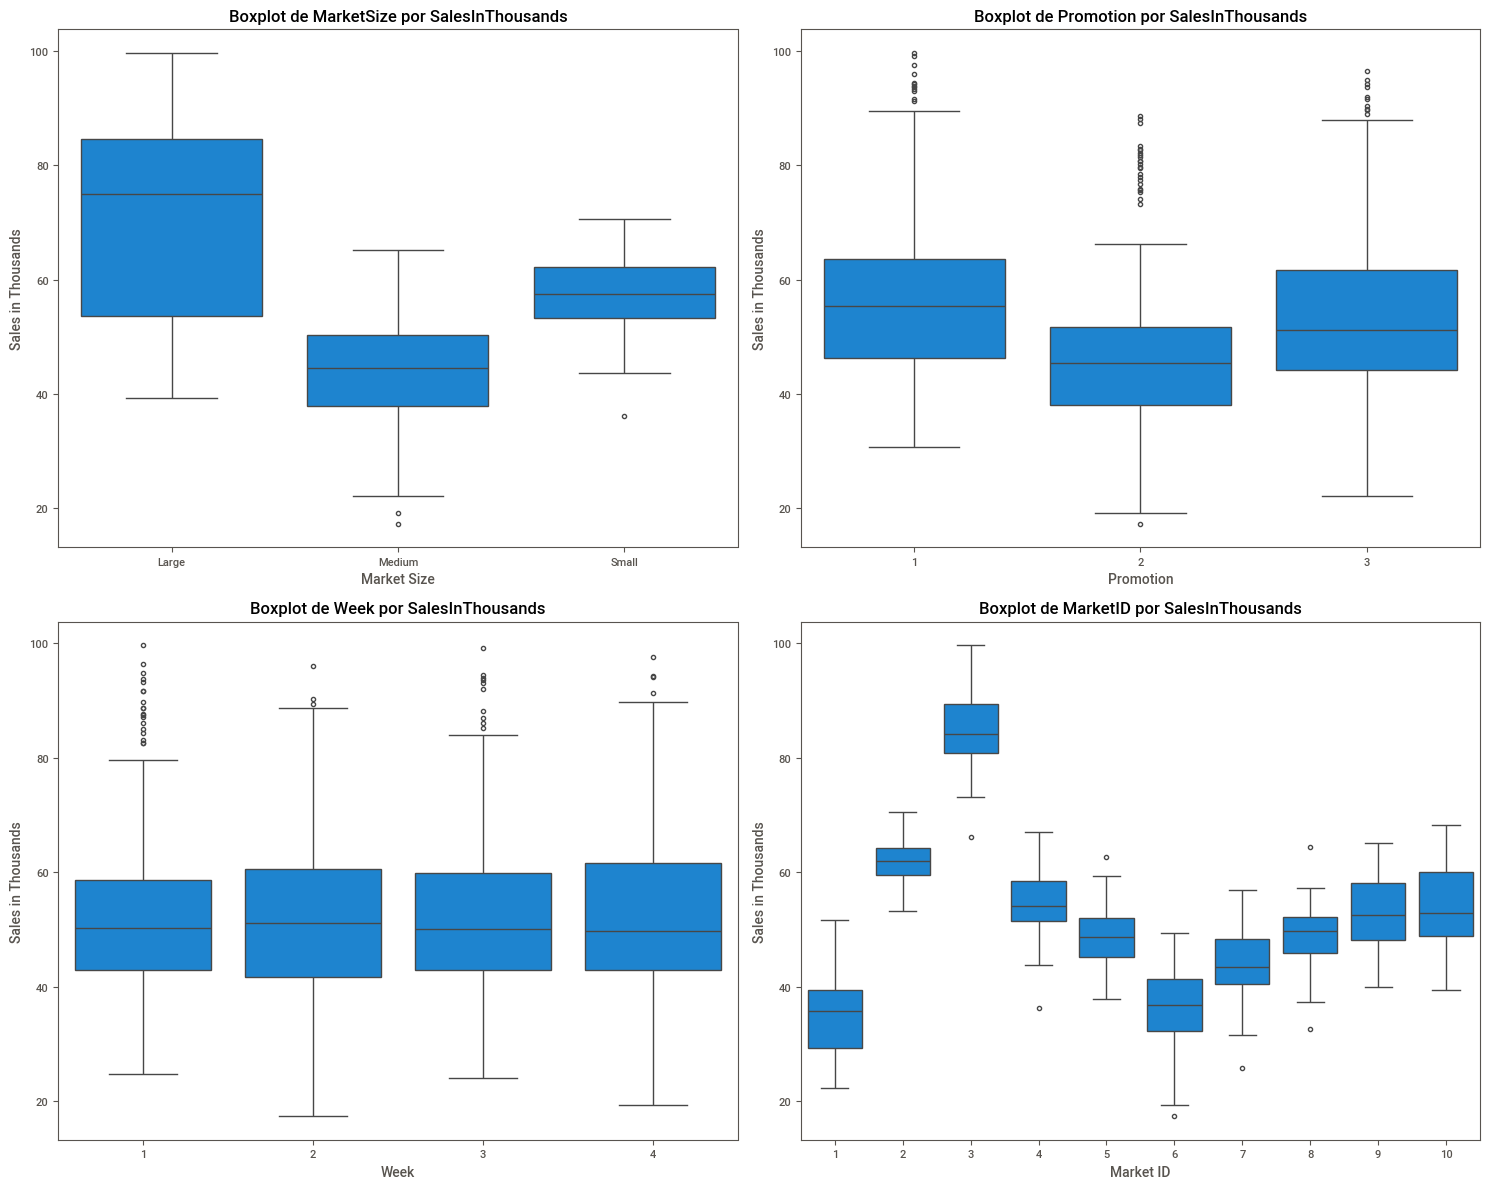

In [74]:
# Criar uma figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot de MarketSize por SalesInThousands
sns.boxplot(x='MarketSize', y='SalesInThousands', data=df_corrigido, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de MarketSize por SalesInThousands')
axes[0, 0].set_xlabel('Market Size')
axes[0, 0].set_ylabel('Sales in Thousands')

# Boxplot de Promotion por SalesInThousands
sns.boxplot(x='Promotion', y='SalesInThousands', data=df_corrigido, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Promotion por SalesInThousands')
axes[0, 1].set_xlabel('Promotion')
axes[0, 1].set_ylabel('Sales in Thousands')

# Boxplot de Week por SalesInThousands
sns.boxplot(x='week', y='SalesInThousands', data=df_corrigido, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Week por SalesInThousands')
axes[1, 0].set_xlabel('Week')
axes[1, 0].set_ylabel('Sales in Thousands')

# Boxplot de MarketID por SalesInThousands
sns.boxplot(x='MarketID', y='SalesInThousands', data=df_corrigido, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de MarketID por SalesInThousands')
axes[1, 1].set_xlabel('Market ID')
axes[1, 1].set_ylabel('Sales in Thousands')

# Ajustar layout
plt.tight_layout()
plt.show()

In [80]:
pd.DataFrame(df_corrigido.groupby(['MarketID','MarketSize'],observed=True)['SalesInThousands'].mean().sort_values(ascending=False))

,,SalesInThousands
MarketID,MarketSize,
3,Large,84.971705
2,Small,61.761250
4,Small,54.508056
10,Large,53.776250
9,Medium,52.940750
8,Medium,48.952917
5,Medium,48.838000
7,Medium,44.475333
6,Medium,36.397500


In [87]:
pd.DataFrame(df_corrigido.groupby(['Promotion','week'],observed=True)['SalesInThousands'].mean().sort_values(ascending=False))

SalesInThousands
Promotion week                  
1         3            58.774884
          4            58.447209
          1            58.244419
          2            56.929535
3         2            55.949149
          1            55.776170
          4            55.354681
          3            54.377872
2         1            47.730213
          3            47.722128
          2            47.582553
          4            46.282766

- MarketSize: Large parece sobressair
- Promotion: Promotion 2 parece pior
- Week: Parece não ter efeito
- MarketID: MarketID 3 bem acima dos demais

##### Boxplots y=AgeOfStore

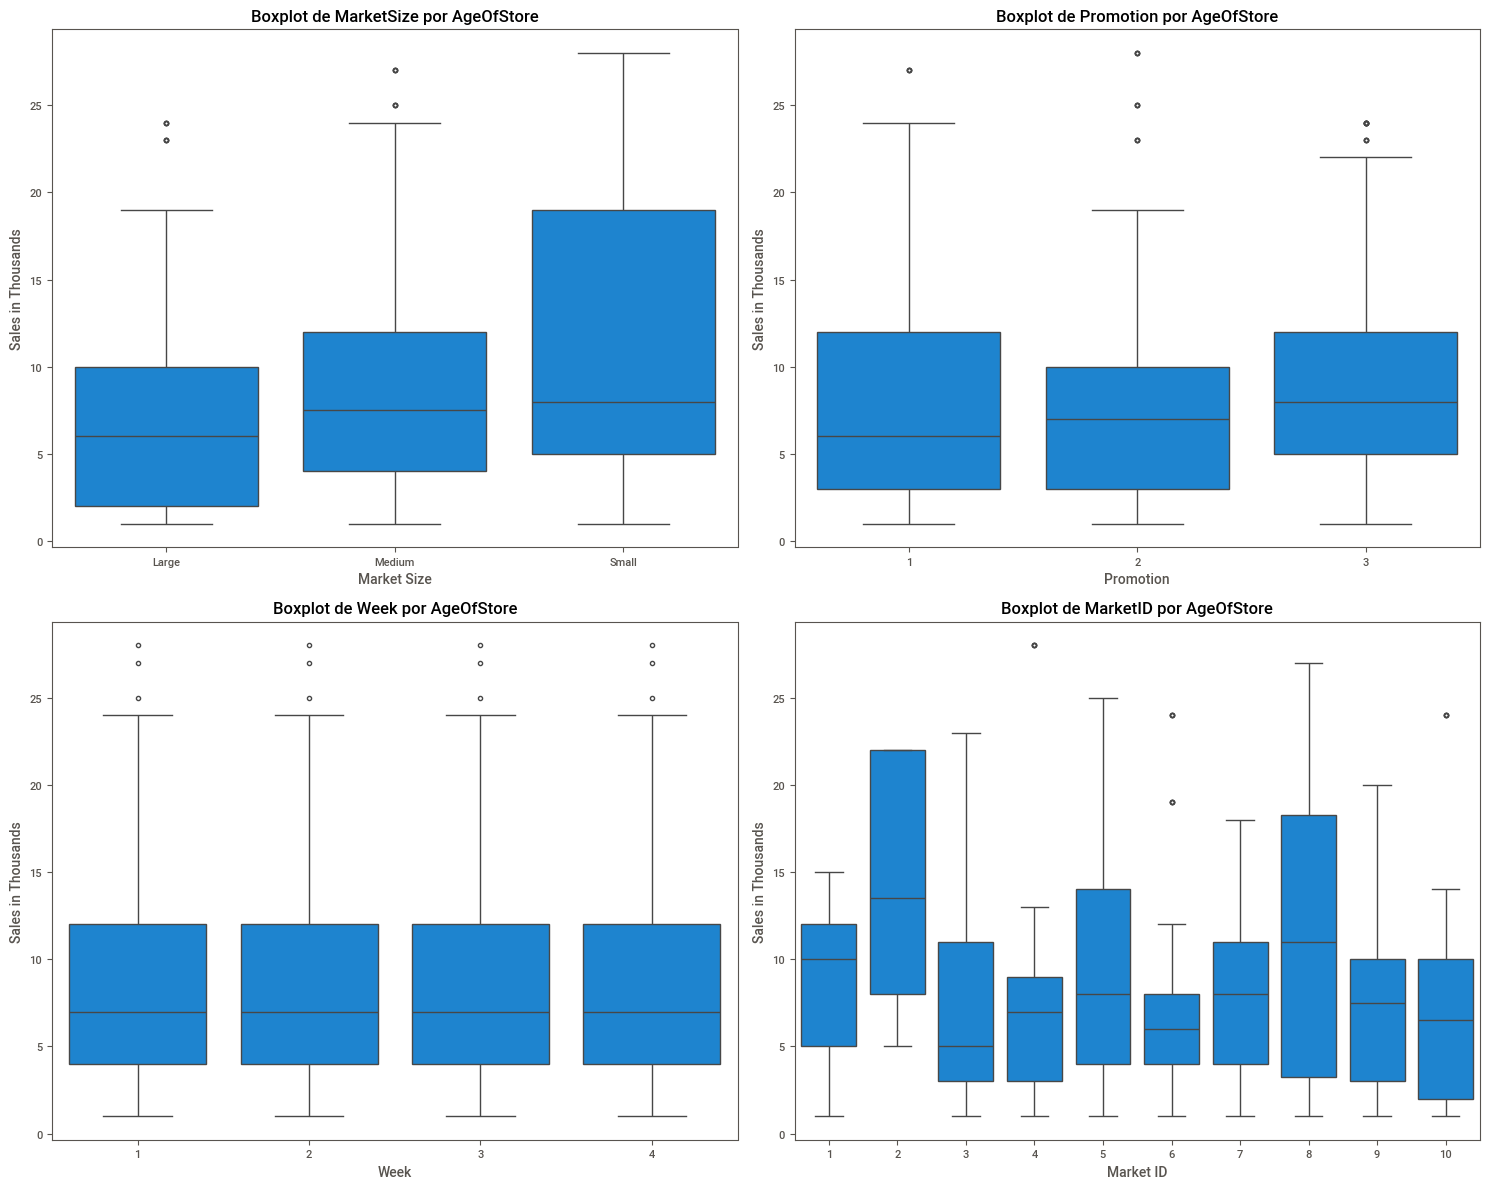

In [75]:
# Criar uma figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot de MarketSize por AgeOfStore
sns.boxplot(x='MarketSize', y='AgeOfStore', data=df_corrigido, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de MarketSize por AgeOfStore')
axes[0, 0].set_xlabel('Market Size')
axes[0, 0].set_ylabel('Sales in Thousands')

# Boxplot de Promotion por AgeOfStore
sns.boxplot(x='Promotion', y='AgeOfStore', data=df_corrigido, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Promotion por AgeOfStore')
axes[0, 1].set_xlabel('Promotion')
axes[0, 1].set_ylabel('Sales in Thousands')

# Boxplot de Week por AgeOfStore
sns.boxplot(x='week', y='AgeOfStore', data=df_corrigido, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Week por AgeOfStore')
axes[1, 0].set_xlabel('Week')
axes[1, 0].set_ylabel('Sales in Thousands')

# Boxplot de MarketID por AgeOfStore
sns.boxplot(x='MarketID', y='AgeOfStore', data=df_corrigido, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de MarketID por AgeOfStore')
axes[1, 1].set_xlabel('Market ID')
axes[1, 1].set_ylabel('Sales in Thousands')

# Ajustar layout
plt.tight_layout()
plt.show()

Idades das lojas por cada uma das segmentações parece razoavelmente similar. 

Em MarketSize small temos um percentil 75 mais elevado; idade do MarketID 2 também com percentil 75 mais elevado que as demais.

##### Idade x Vendas

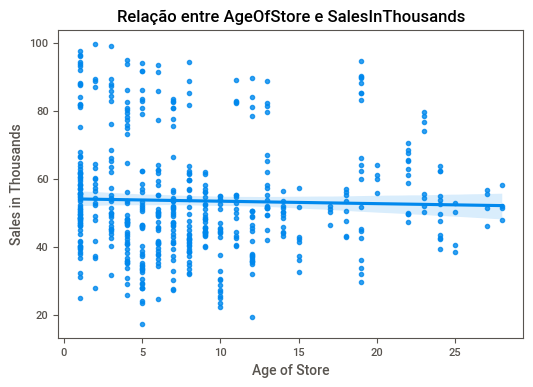

In [76]:
# Criar gráfico de dispersão com linha de regressão
plt.figure(figsize=(6, 4))
sns.regplot(x='AgeOfStore', y='SalesInThousands', data=df_corrigido)
plt.title('Relação entre AgeOfStore e SalesInThousands')
plt.xlabel('Age of Store')
plt.ylabel('Sales in Thousands')
plt.show()

In [33]:
correlation = df['AgeOfStore'].corr(df['SalesInThousands'])
print(correlation)

-0.02853288110249563


Idade parece não ter efeito nas vendas

### Statistical Hypothesis Testing

Vimos pela Análise Exploratória de Dados (EDA) que a distribuição dos dados das promoções através das outras variáveis é similar, com exceção de MarketID. Podemos realizar os testes sem maiores preocupações quanto às segmentações (talvez MarketID sim?)

In [92]:
t,p = stats.ttest_ind(
    df.loc[df_corrigido['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df_corrigido['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var=False
    )

In [93]:
print("t-value:", t)
print("p-value:", p)

t-value: 6.42752867090748
p-value: 4.2903687179871785e-10


Estatisticamente significativo. Hipótese nula rejeitada.

In [94]:
t,p = stats.ttest_ind(
    df.loc[df_corrigido['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df_corrigido['Promotion'] == 3, 'SalesInThousands'].values,
    equal_var=False
    )

In [95]:
print("t-value:", t)
print("p-value:", p)

t-value: 1.5560224307758634
p-value: 0.12059147742229478


Estatisticamente não significativo. Hipótese nula confirmada.

In [96]:
t,p = stats.ttest_ind(
    df.loc[df_corrigido['Promotion'] == 3, 'SalesInThousands'].values,
    df.loc[df_corrigido['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var=False
    )

In [97]:
print("t-value:", t)
print("p-value:", p)

t-value: 4.88139271089348
p-value: 1.5692733176039892e-06


Estatisticamente significativo. Hipótese nula rejeitada.

**Conclusão:** 

As Promoções 1 e 3 se mostram de fato melhores do que a 2. No entanto, não há diferença estatisticamente significativa entre as promoções 1 e 3 com base nos dados utilizados. 

Portanto, a empresa poderia seguir tanto com a promoção 1 quanto com a 3, talvez decidindo entre as duas com base no custo de execução das promoções (informação que não possuímos no dataset). 